# Exploratory Data Analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import pickle

## Import data and create Dataframe

In [2]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/sales.csv")
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


## Descriptive Analysis

In [3]:
# Check the dimensions
df.shape

(366, 2)

In [4]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# Looking for missing values
df.isna().sum()

date     0
sales    0
dtype: int64

## Build and analyze the time series

In [6]:
# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

In [7]:
# Set date as the index of the DataFrame
df = df.set_index("date")

In [8]:
# Ensure the time series is sorted chronologically
df = df.sort_index()

In [9]:
df.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


## Plot the time series

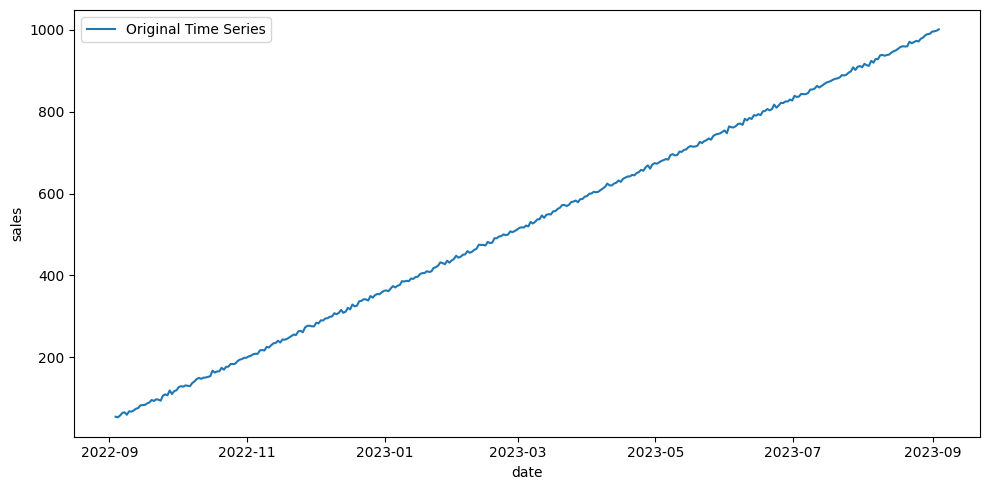

In [10]:
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df["sales"], label="Original Time Series")

plt.tight_layout()
plt.show()

## Time Series Decomposition

In [11]:
# Decompose the time series weekly
decomposition = seasonal_decompose(df["sales"], period=7)

In [12]:
# Extract trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

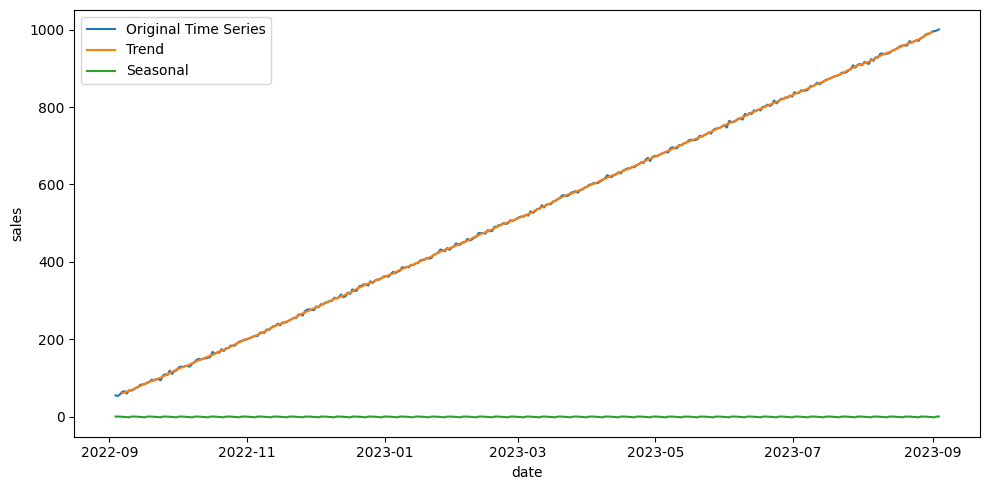

In [ ]:
# Plot original series, trend and seasonal components
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df["sales"], label="Original Time Series")
sns.lineplot(data=trend, label="Trend")
sns.lineplot(data=seasonal, label="Seasonal")

plt.tight_layout()
plt.show()

### Observations
The original time series (blue line) shows the actual daily sales data with a clear and steady increasing trend over the entire period. The trend component (orange line), extracted by the decomposition method, almost perfectly overlaps with the original series, indicating that the trend explains nearly all the variation in sales. This trend is strong and linearly increasing without major fluctuations. The seasonal component (green line) represents repeating seasonal or cyclic patterns but is very small and nearly flat, suggesting there is no significant seasonality in the sales data.

## Dickey–Fuller Test

In [15]:
# Run ADF test
adf_result = adfuller(df["sales"])

In [16]:
# Saving results in dict
results = {"ADF Statistic": adf_result[0], "p-value": adf_result[1], "Lags Used": adf_result[2], "Number of Observations": adf_result[3], "Critical Values": adf_result[4]}

In [17]:
# Showing results
results

{'ADF Statistic': np.float64(0.545414193706378),
 'p-value': np.float64(0.9861899815311064),
 'Lags Used': 13,
 'Number of Observations': 352,
 'Critical Values': {'1%': np.float64(-3.4490648539347544),
  '5%': np.float64(-2.8697861692116478),
  '10%': np.float64(-2.5711631253228306)}}

### Observations
The ADF test result shows a very high p-value (0.986), which is far above the 0.05 threshold. This indicates that the time series is not stationary. The series contains a strong upward trend.

## ARIMA model

In [20]:
# Creating model
model = auto_arima(df["sales"], seasonal=True, trace=True, m=7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=0.28 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=0.41 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.13 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=0.75 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=0.93 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=0.60 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=0.25 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=0.58 sec
 ARIMA(2,1,0)(1,0,2)[7] intercept   : AIC=1

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  366
Model:             SARIMAX(4, 1, 1)x(0, 0, 1, 7)   Log Likelihood                -912.372
Date:                           Sat, 06 Dec 2025   AIC                           1840.744
Time:                                   14:38:27   BIC                           1871.943
Sample:                               09-03-2022   HQIC                          1853.143
                                    - 09-03-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8853      0.378      7.634      0.000       2.145       3.626
ar.L1         -0.0805      0.054     -1.500      0.134      -0.186       0.025
ar.L2          0.0168      0.063      0.269      0.788      -0.106       0.139
ar.L3          0.0242      0.058      0.414      0.679      -0.090       0.139
ar.L4         -0.0713      0.053     -1.351      0.177      -0.175       0.032
ma.L1         -0.9393      0.026    -36.334      0.000      -0.990      -0.889
ma.S.L7        0.1039      0.053      1.944      0.052      -0.001       0.209
sigma2         8.4131      0.658     12.789      0.000       7.124       9.702
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.95   Prob(JB):                         0.62
Heteroskedasticity (H):               0.91   Skew:                             0.07
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Forecast the next 30 periods (days)
forecast = model.predict(n_periods=30)

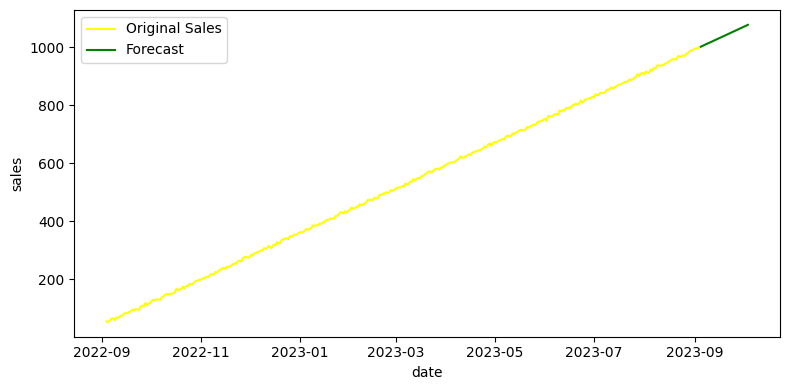

In [ ]:
# Plot the original sales series and the forecasted values to visually compare trends
fig, axis = plt.subplots(figsize=(8, 4))
sns.lineplot(data=df["sales"], label="Original Sales", color="yellow")
sns.lineplot(data=forecast, label="Forecast", color="green")

plt.tight_layout()
plt.show()

### Conclusion
The green line (forecast) follows the upward trend of the original sales series, indicating that the model predicts the trend well.

## Saving model

In [26]:
with open("/workspaces/josefina-aispuro-merelles-machine-learning/models/auto_arima_model.pkl", "wb") as file:
    pickle.dump(model, file)